In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.style.use('ggplot')

# Table of contents

* [**1. Data preparation**](#1)
    * [**1.1 Load data**](#1.1)
    * [**1.2 Clean columns**](#1.2)
* [**2. Gig market analysis**](#2)
    * [**2.1 Market composition**](#2.1)
    * [**2.2 Rising talent**](#2.2)
    
<a name='1'></a>
# 1. Data preparation
<a name='1.1'></a>
## 1.1 Load data

Data was scraped from fiverr.com `2021/09/06` - `2021/09/08` using **data science**, **data danalytics**, **data visualization**, **data engineering** and **data entry search** search tearms.

In [2]:
df = pd.read_csv('data/fiverr_sample.csv', index_col=0)
df.head()

,Seller_name,Gig_URL,Gig_name,Seller_lvl,One_liner,Review_score,Review_count,Price_basic,Price_Standard,Price_premium,Origin,Member_since,Response_time,Last_delivery,Cat,SubCat
0,mnaknabeel,https://www.fiverr.com/mnaknabeel/do-spss-data...,I will do spss data analysis and interpretatio...,Level 2 Seller,Worked for over 250 clients all over the world...,4.9,(101),€26.50,€176.67,€265.00,Pakistan,Mar 2013,4 hours,4 days,Data,Data Analytics
1,stat_george,https://www.fiverr.com/stat_george/help-you-wi...,I will help you with probability distributions...,Level 1 Seller,Well done is better than well said,5.0,(8),€4.42,€8.83,€26.50,Sri Lanka,Mar 2021,1 hour,about 4 hours,Data,Data Analytics
2,surewriterpro,https://www.fiverr.com/surewriterpro/guide-in-...,I will guide in statistics and research,Level 2 Seller,I am an experienced Researcher who delivers qu...,4.9,(169),€8.83,NaN,NaN,Kenya,Mar 2016,1 hour,about 8 hours,Data,Data Analytics
3,nadeemk46,https://www.fiverr.com/nadeemk46/be-your-googl...,I will be your google sheets wizard,Level 2 Seller,To Infinity and Beyond,5.0,(1010),€4.42,€22.08,€88.33,India,Dec 2015,1 hour,about 9 minutes,Data,Data Analytics
4,leshau,https://www.fiverr.com/leshau/do-professional-...,I will do professional data and business analy...,Level 2 Seller,Data Analyst and Market Research,4.9,(17),€44.17,€88.33,€141.33,Kenya,Jun 2016,1 hour,1 day,Data,Data Analytics


<a name='1.2'></a>
## 1.2 Clean columns

In [3]:
# Extract numerical value when was the last delivery

# print examples of last time delivered strings
# print(df.Last_delivery.unique())

# create dictonary for different times
time_dict = {'now': 0, 'minute': 1, 'minutes': 1, 'hour': 60, 'hours': 60, 'day': 1440, 'days': 1440,
             'week': 10080,  'weeks': 10080, 'month': 43830, 'months': 43830, 'year': 525600, 'found': -1}

def time_converter(s, time_dict=time_dict):
    """
    Input:
        s: string, e.g. 'about 12 hours', 9 months', 'about 17 minutes'
    
    Returns time rounded to minutes as integer.
    """
    # get multiplayer
    mul = time_dict[s.split(' ')[-1]]
    # get number value
    if mul > 0:
        num = mul * int(s.split(' ')[-2])
    else:
        num = mul

    return num

In [4]:
# fill NAN values with unique keyword
df.Last_delivery = df.Last_delivery.fillna('not found')
# NAN values are replaced with -1
df.Last_delivery = df.Last_delivery.apply(lambda x: time_converter(x))

df.head()

,Seller_name,Gig_URL,Gig_name,Seller_lvl,One_liner,Review_score,Review_count,Price_basic,Price_Standard,Price_premium,Origin,Member_since,Response_time,Last_delivery,Cat,SubCat
0,mnaknabeel,https://www.fiverr.com/mnaknabeel/do-spss-data...,I will do spss data analysis and interpretatio...,Level 2 Seller,Worked for over 250 clients all over the world...,4.9,(101),€26.50,€176.67,€265.00,Pakistan,Mar 2013,4 hours,5760,Data,Data Analytics
1,stat_george,https://www.fiverr.com/stat_george/help-you-wi...,I will help you with probability distributions...,Level 1 Seller,Well done is better than well said,5.0,(8),€4.42,€8.83,€26.50,Sri Lanka,Mar 2021,1 hour,240,Data,Data Analytics
2,surewriterpro,https://www.fiverr.com/surewriterpro/guide-in-...,I will guide in statistics and research,Level 2 Seller,I am an experienced Researcher who delivers qu...,4.9,(169),€8.83,NaN,NaN,Kenya,Mar 2016,1 hour,480,Data,Data Analytics
3,nadeemk46,https://www.fiverr.com/nadeemk46/be-your-googl...,I will be your google sheets wizard,Level 2 Seller,To Infinity and Beyond,5.0,(1010),€4.42,€22.08,€88.33,India,Dec 2015,1 hour,9,Data,Data Analytics
4,leshau,https://www.fiverr.com/leshau/do-professional-...,I will do professional data and business analy...,Level 2 Seller,Data Analyst and Market Research,4.9,(17),€44.17,€88.33,€141.33,Kenya,Jun 2016,1 hour,1440,Data,Data Analytics


In [5]:
# convert text to numeric values
df.Review_score = df.Review_score.astype(float)

def convert_2_float(s, s_format='euro'):
    """
    Input:
        s: string,
        s_format, keyword how to handle string
    Returns numeric or NAN value based on string format
    """
    if s != s:
        return np.nan
    else:
        if s_format == 'euro':
            return float(s[1:].replace(',', ''))
        elif s_format == 'r_count':
            return int(s[1:-1])
        
        
df.Price_basic = df.Price_basic.apply(lambda x: convert_2_float(x))
df.Price_Standard = df.Price_Standard.apply(lambda x: convert_2_float(x))
df.Price_premium = df.Price_premium.apply(lambda x: convert_2_float(x))
df.Review_count = df.Review_count.apply(lambda x: convert_2_float(x, 'r_count'))

# convert to datetime 'Member since'
df.Member_since = pd.to_datetime(df.Member_since, format='%b %Y')

# fill NAN values with Seller level 0
df.Seller_lvl = df.Seller_lvl.fillna('Level 0 Seller')

In [6]:
import pycountry_convert as pc

def country_2_continent(x):
    """
    Input:
        x: string
    Returns continent name
    """
    if x != x:
        return np.nan
    else:
        country_code = pc.country_name_to_country_alpha2(x, cn_name_format="default")
        return pc.country_alpha2_to_continent_code(country_code)

# handle naming exceptions
country_dict = {'Kosovo': 'Serbia', 'Macedonia [FYROM]': 'Macedonia'}
df.Origin = df.Origin.replace(country_dict)
# create new feature with continent
df['Continent'] = df.Origin.apply(lambda x: country_2_continent(x))

# rename continents
df.Continent =  df.Continent.replace({'EU': "Europe", 'NA': 'North America', 'AS': 'Asia',
                                      'SA': 'South America', 'AF': 'Africa', 'OC': 'Oceania'})

df.head()

,Seller_name,Gig_URL,Gig_name,Seller_lvl,One_liner,Review_score,Review_count,Price_basic,Price_Standard,Price_premium,Origin,Member_since,Response_time,Last_delivery,Cat,SubCat,Continent
0,mnaknabeel,https://www.fiverr.com/mnaknabeel/do-spss-data...,I will do spss data analysis and interpretatio...,Level 2 Seller,Worked for over 250 clients all over the world...,4.9,101.0,26.50,176.67,265.00,Pakistan,2013-03-01,4 hours,5760,Data,Data Analytics,Asia
1,stat_george,https://www.fiverr.com/stat_george/help-you-wi...,I will help you with probability distributions...,Level 1 Seller,Well done is better than well said,5.0,8.0,4.42,8.83,26.50,Sri Lanka,2021-03-01,1 hour,240,Data,Data Analytics,Asia
2,surewriterpro,https://www.fiverr.com/surewriterpro/guide-in-...,I will guide in statistics and research,Level 2 Seller,I am an experienced Researcher who delivers qu...,4.9,169.0,8.83,NaN,NaN,Kenya,2016-03-01,1 hour,480,Data,Data Analytics,Africa
3,nadeemk46,https://www.fiverr.com/nadeemk46/be-your-googl...,I will be your google sheets wizard,Level 2 Seller,To Infinity and Beyond,5.0,1010.0,4.42,22.08,88.33,India,2015-12-01,1 hour,9,Data,Data Analytics,Asia
4,leshau,https://www.fiverr.com/leshau/do-professional-...,I will do professional data and business analy...,Level 2 Seller,Data Analyst and Market Research,4.9,17.0,44.17,88.33,141.33,Kenya,2016-06-01,1 hour,1440,Data,Data Analytics,Africa


<a name='2'></a>
# 2. Gig market analysis

### Helper functions for visualizing data

In [7]:
def get_data(df, tags, no_delivery=True, x_days=10000, date_off=False):
    """
    Input:
        df: pandas DataFrame
        tags: list, e.g. ['Data', 'Science']
        no_delivery: boolean, True- exclude gigs with no eported deliveries
        x_days: int, how many days since last delivery (to help filter out inactive gigs)
        date_off: pandas DateOffset object, e.g. pd.DateOffset(months=7) 
        pd.to_datetime('2021-09-09') - pd.DateOffset(months=7)
    Returns DataFrame with gigs with spesific tags
    """
    # sellet Gigs with category and sub-category tags
    _df = df.loc[(df.Cat == tags[0]) & (df.SubCat == tags[1])].copy()
    # exclude Gigs with no reported deliveries
    if no_delivery:
        _df = _df[_df.Last_delivery>=0].copy()
        
    # convert last delivery to days
    _df.Last_delivery = (_df.Last_delivery/1440).round(1)
    
    # exclude gigs with last delivery > 3 months
    _df = _df[_df.Last_delivery<=x_days].copy()
    
    # filter out X amount of months/days/years
    if date_off:
        # that is minimum start time
        min_start = pd.to_datetime('2021-09-01') - date_off
        _df = _df[_df.Member_since >= min_start].copy()
        # add minimum time as a seller
        max_start = pd.to_datetime('2021-09-01') - pd.DateOffset(months=2)
        _df = _df[_df.Member_since <= max_start].copy()
        
    return _df

def plot_piechart(df, tags=['Data', 'Science'], no_delivery=True, title=''):
    """
    Input:
        df: pandas DataFrame
        tags: list, e.g. ['Data', 'Science']
        no_delivery: boolean, True- exclude gigs with no eported deliveries
        title: string, add custom title to figure
    Plots to pie charts
    """    
    fig, axs = plt.subplots(1, 2, figsize=(16, 4))
    axs = axs.flatten()

    # pie chart by continents
    pie_data = df.Continent.value_counts()
    # extrude parts of data for better visibility
    axs[0].pie(pie_data.values, labels = pie_data.index.values, autopct='%.1f%%')
    axs[0].set_title(f'Talents per continent (n={len(df)})')

    # pie chart by Seller level
    pie_data = df.Seller_lvl.value_counts()
    axs[1].pie(pie_data.values, labels = pie_data.index.values, autopct='%.1f%%')
    axs[1].set_title('Seller levels')
    
    if len(title) > 0:
        fig.suptitle(title, fontsize=16)

    plt.tight_layout()    

<a name='2.1'></a>
## 2.1 All talent distribution

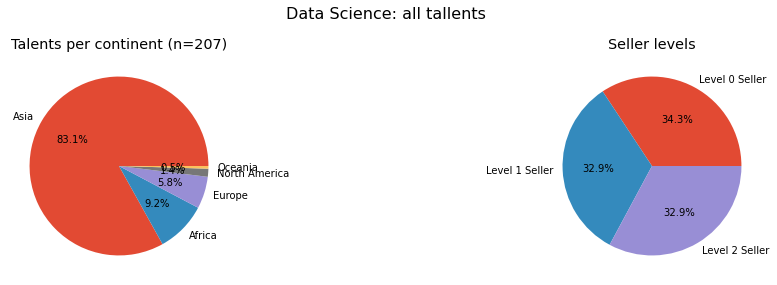

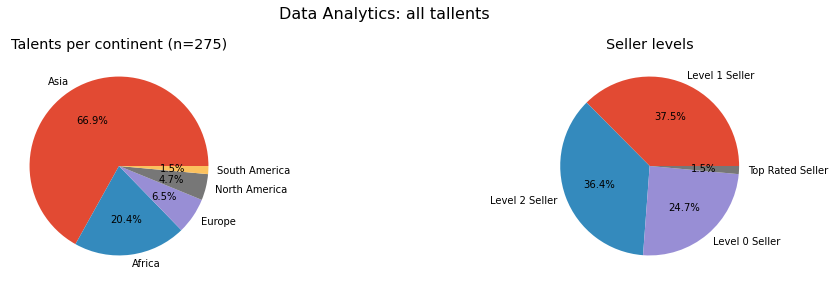

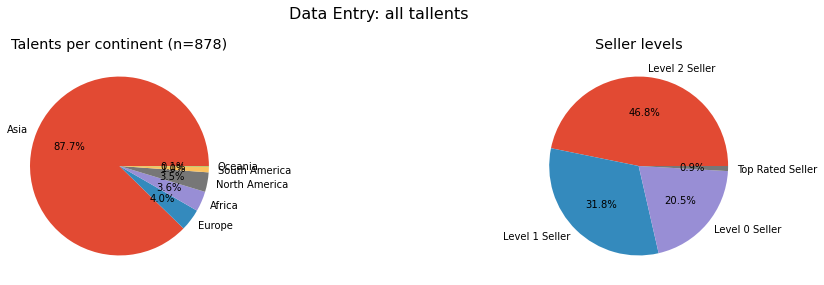

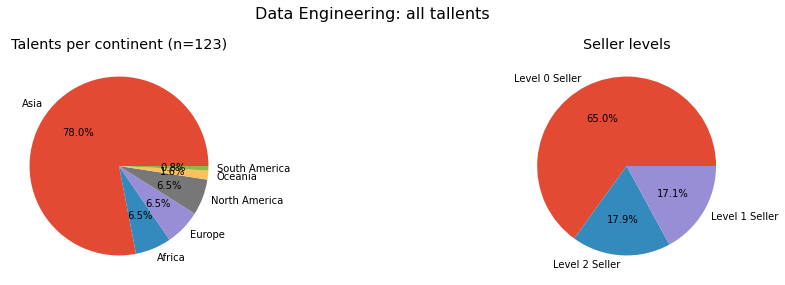

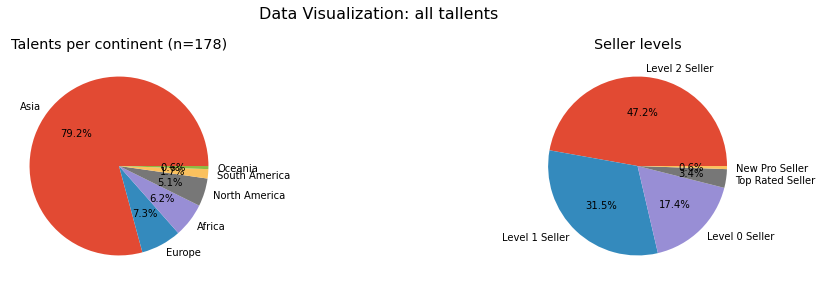

In [8]:
tags = [['Data', 'Data Science'], ['Data', 'Data Analytics'], ['Data', 'Data Entry'],
        ['Data', 'Data Engineering'], ['Data', 'Data Visualization']]

for tag in tags:
    df_plot = get_data(df, tag, True, 93)
    plot_piechart(df_plot, title=f'{tag[1]}: all tallents')

<a name='2.2'></a>
## 2.2 Rising talent

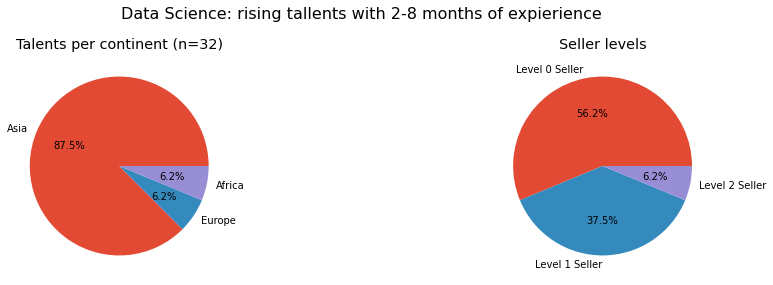

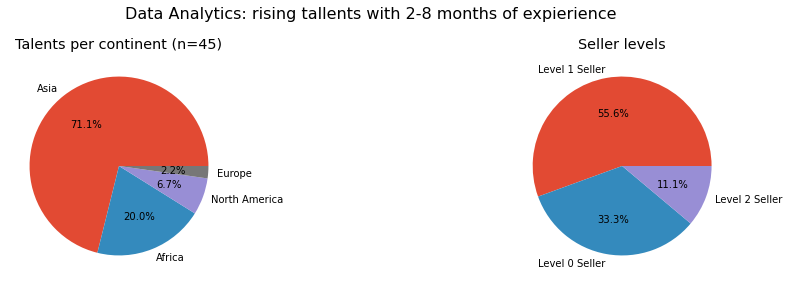

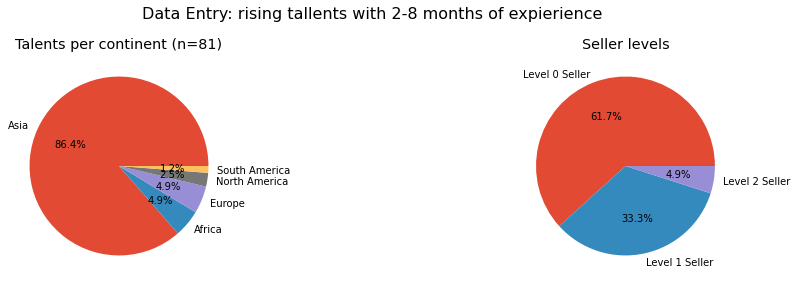

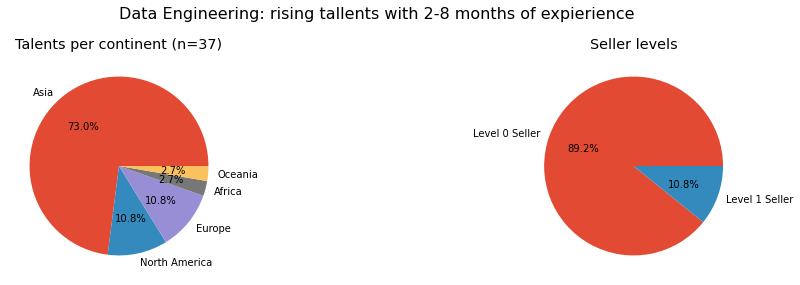

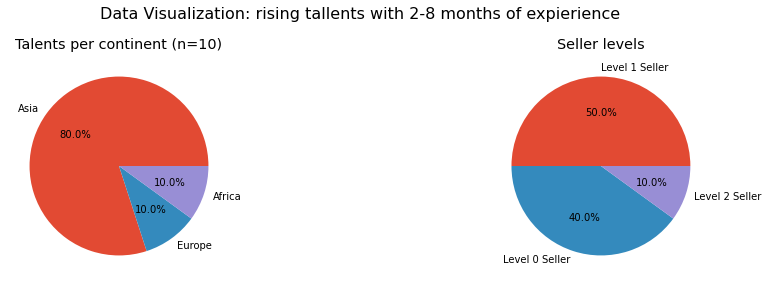

In [9]:
for tag in tags:
    df_plot = get_data(df, tag, True, 93, pd.DateOffset(months=8))
    plot_piechart(df_plot, title=f'{tag[1]}: rising tallents with 2-8 months of expierience')